### Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.


1.From the list of instagram handles you obtained when you searched ‘food’ in previous project. 
Open the first 10 handles and find the top 5 which have the highest number of followers


2.Now Find the number of posts these handles have done in the previous 3 days.


3.Depict this information using a suitable graph.

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
import time
from bs4 import BeautifulSoup
from selenium import webdriver
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
driver=webdriver.Chrome(executable_path="chromedriver")  
driver.get("https://www.instagram.com/")

In [2]:
from selenium.webdriver.support.ui import WebDriverWait

username=driver.find_element_by_name("username")
username.send_keys("darkdoll_cyberspace")    ## here replace sample by your user-name

password=driver.find_element_by_name("password")
password.send_keys("insta@123")   ### here replace sample by your password

### clicking on submit button


password.submit()



time.sleep(6)

# to handle notifications pop-up(may depend on individual id)

wait = WebDriverWait(driver, 5) 

# sqdOP  L3NKy   y3zKF    
press_not_now= driver.find_element_by_class_name('sqdOP.yWX7d.y3zKF')
press_not_now.click()

wait = WebDriverWait(driver, 5) 

notification=driver.find_element_by_class_name('mt3GC')
notification.click()


In [3]:
search_click=driver.find_element_by_class_name('TqC_a')
search_click.click()
time.sleep(2)
search=driver.find_element_by_class_name('x3qfX')
search.send_keys('food')
time.sleep(2)

In [5]:
from bs4 import BeautifulSoup as bs
# same as Instabot 1
response=bs(driver.page_source,'lxml')
time.sleep(1)
lst=response.find_all(class_='Ap253')
usernames=[]
for i in lst:
    if '#' in i.string:
        continue
    else:
        usernames.append(i.string)
time.sleep(4)
usernames

['delhifoodguide',
 'yourfoodlab',
 'odia_food',
 'ndtv_food',
 'bongeats',
 'foodtalkindia',
 'food',
 'delhifoodwalks',
 'food_o_pedia_',
 'foodlamour',
 'food_gambler',
 'foodgod',
 'foodinsider',
 'meghnasfoodmagic',
 'kolkatalittlethings',
 'sinful_foodie',
 'foodpandaindia',
 'foodelhi',
 'foodporn',
 'food_belly11',
 'foodies_freak',
 'kolkatafoodie',
 'food_and_apetite',
 'indiainsiders',
 'tehranfastfoods',
 'tashasartisanfoods',
 'my_foodstory',
 'buzzfeedfood',
 'foodiehot_bazaar',
 'mumbaifoodie',
 'foodiesince96',
 'kolkatasutrafood',
 'kolkatarito',
 'therapyfoodgal',
 'foodpicasso10',
 'Food Street',
 'holybelly_foodboutique',
 '__food_it__',
 'karanfoodfanatic',
 'food_gasms1',
 '_food.and.the.city_',
 'Food Mini',
 'thegreatindianfoodie',
 'dogs_infood',
 'food___blogger6',
 'expedition.food',
 'salonikukreja',
 'food_block0',
 'bestfood_aroundtheworld',
 'Food Mini']

In [6]:
# taking 10 names
usernames=usernames[:11]
ursernames=usernames.remove('food')

In [33]:

followers_count=[]
for i in usernames:
    try:
        driver.get('https://www.instagram.com/')
        time.sleep(4)
        search_click=driver.find_element_by_class_name('TqC_a')
        search_click.click()
        time.sleep(2)
        search=driver.find_element_by_class_name('x3qfX')
        search.send_keys(i)
        time.sleep(5)
        driver.execute_script('document.getElementsByClassName("fuqBx")[0].scrollTo(0, 50);')
        so=driver.find_element_by_partial_link_text(i)
        so.click()
        time.sleep(3)
        followers=wait.until(EC.presence_of_element_located((By.XPATH,'//a[@class="-nal3 "]/span[@class="g47SY "]')))
   
        k=followers.get_attribute('title')
        if "," in k:
            k=k.replace(",","")
        followers_count.append(int(k))
    except TimeoutException:
        pass
followers_count
testfollow=[]
for m in followers_count:
    testfollow.append(m)
testfollow

[104030, 1508391, 78228, 99378, 58008, 303116, 130927, 5734, 17910, 107770]

In [34]:

gett=followers_count
gett

[104030, 1508391, 78228, 99378, 58008, 303116, 130927, 5734, 17910, 107770]

In [35]:
testfollow=[3596819,3763267,10280357,2644303,3352572,31458,362,7016888,2183759,13748]

In [36]:

#making a dictionary of usernames and their followers 
add=followers_count
ans=dict()
for key in usernames:
    for value in add:
        ans[key]=value
        add.remove(value)
        break
ans

{'delhifoodguide': 104030,
 'yourfoodlab': 1508391,
 'odia_food': 78228,
 'ndtv_food': 99378,
 'bongeats': 58008,
 'foodtalkindia': 303116,
 'delhifoodwalks': 130927,
 'food_o_pedia_': 5734,
 'foodlamour': 17910,
 'food_gambler': 107770}

In [37]:
sort_ans=sorted(ans.items(),key=lambda kv:kv[1],reverse=True)[:5]
print("highest number of followers Top 5 handels")
print()
famous5=[] 
famous5follow=[]
for i in sort_ans:
    print(i[0],":",i[1])
    famous5.append(i[0])
    famous5follow.append(i[1])
famous5
famous5follow

highest number of followers Top 5 handels

yourfoodlab : 1508391
foodtalkindia : 303116
delhifoodwalks : 130927
food_gambler : 107770
delhifoodguide : 104030


[1508391, 303116, 130927, 107770, 104030]

In [38]:
no_of_posts=[]
for i in famous5:
    first_run = True
    driver.get('https://www.instagram.com/')
    time.sleep(5)
    search_click=driver.find_element_by_class_name('TqC_a')
    search_click.click()
    time.sleep(5)
    search=driver.find_element_by_class_name('x3qfX')
    search.send_keys(i)
    time.sleep(5)
    driver.execute_script('document.getElementsByClassName("fuqBx")[0].scrollTo(0, 50);')
    so=driver.find_element_by_partial_link_text(i)
    so.click()
    time.sleep(5)
    count=0
    
    time.sleep(5)
    post_data = driver.find_elements_by_xpath('//a/div[@class="eLAPa"]')
    for j in post_data:
        
        time.sleep(10)
        if first_run:    
            j.click()
            first_run = False
        wait.until(EC.presence_of_element_located((By.XPATH, '//time[contains(@class, "Nzb55")]')))
        timer=driver.find_element_by_xpath('//a/time[contains(@class,"_1o9PC")]')
        time_string=timer.text
        if "HOURS" in time_string or "HOUR" in time_string:
            count+=1
        elif "MINUTES" in time_string or "MINUTE" in time_string:
            count+=1
        elif time_string=="1 DAY AGO":
            count+=1
        elif time_string=="2 DAYS AGO":
            count+=1
        elif time_string=="3 DAYS AGO":
            count+=1
        else:
            break
        time.sleep(5)
        next_post=driver.find_element_by_xpath('//a[contains(@class,"_65Bje ")]')
        time.sleep(5)
        next_post.click()
        time.sleep(5)
    print(i, count, "posts in past 3 days")
    no_of_posts.append(count)
no_of_posts

yourfoodlab have done 4 posts in past 3 days
foodtalkindia have done 4 posts in past 3 days
delhifoodwalks have done 4 posts in past 3 days
food_gambler have done 8 posts in past 3 days
delhifoodguide have done 0 posts in past 3 days


[4, 4, 4, 8, 0]

In [39]:
usernames

['delhifoodguide',
 'yourfoodlab',
 'odia_food',
 'ndtv_food',
 'bongeats',
 'foodtalkindia',
 'delhifoodwalks',
 'food_o_pedia_',
 'foodlamour',
 'food_gambler']

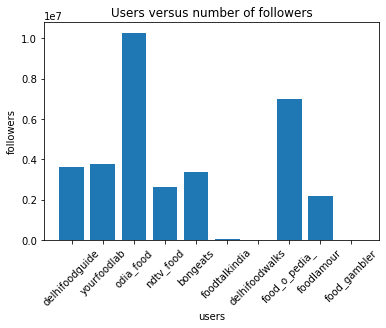

In [50]:
#plotting a graph between those 10 users and the number of followers
from matplotlib.pyplot import figure
plt.xticks(rotation=45)
plt.bar(usernames,height=testfollow)
plt.title('Users versus number of followers')
plt.xlabel('users')
plt.ylabel('followers')
plt.show()

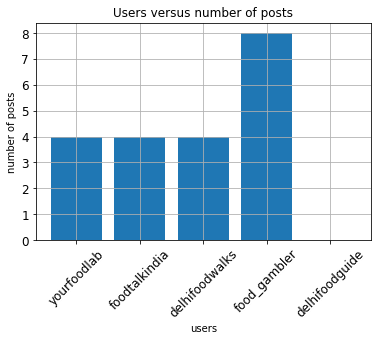

In [51]:
#graph between top 5 users and the number of posts
from matplotlib.pyplot import figure
plt.figure(num=None, edgecolor='k')
plt.bar(famous5,no_of_posts)
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)
plt.title('Users versus number of posts')
plt.xlabel('users')
plt.ylabel('number of posts')
plt.grid()
plt.show()

In [17]:
time.sleep(3)
data=[]
for i in famous5:
    first_run = True
    driver.get('https://www.instagram.com/')
    time.sleep(4)
    search_click=driver.find_element_by_class_name('TqC_a')
    search_click.click()
    time.sleep(2)
    search=driver.find_element_by_class_name('x3qfX')
    search.send_keys(i)
    time.sleep(5)
    driver.execute_script('document.getElementsByClassName("fuqBx")[0].scrollTo(0, 50);')
    so=driver.find_element_by_partial_link_text(i)
    so.click()
    time.sleep(3)
    counter=0
    
    time.sleep(3)
    post_data = driver.find_elements_by_xpath('//a/div[@class="eLAPa"]')
    for j in post_data:
        if counter==10:
            counter=0
            break
        
        time.sleep(7)
        if first_run:    
            j.click()
            first_run = False
        try:
            
            wait.until(EC.presence_of_element_located((By.XPATH, '//a[contains(@class, " xil3i")]')))
            test_data=driver.find_elements_by_xpath('//a[contains(@class, " xil3i")]')
            for k in test_data:
                print(k.text)
                data.append(k.text)
            counter+=1
        except TimeoutException:
            pass
        
        time.sleep(3)
        next_post=driver.find_element_by_xpath('//a[contains(@class,"_65Bje ")]')
        time.sleep(3)
        next_post.click()
        time.sleep(3)
        
data

#recipe
#foodie
#chicken
#chickenrecipes
#chicken65
#chickendinner
#mumbai
#chickensofinstagram
#chickendry
#sanjyotkeer
#recipe
#foodie
#foodporn
#foodstagram
#foodphotography
#foodstylist
#foodiesofinstagram
#recipes
#food
#foodie
#foodporn
#streetfood
#mumbaifoodie
#mumbaistreetfood
#indian
#fusionfood
#fusionfood
#streetsofindia
#sanjyotkeer
#recipe
#foodie
#foodporn
#foodstagram
#foodphotography
#foodstylist
#foodiesofinstagram
#MorphyRichards
#ultimatechristmaschallenge
#recipe
#foodiesofinstagram
#frankie
#streetfood
#foodporn
#sanjyotkeer
#recipe
#gajarkahalwa
#gajarhalwa
#foodie
#foodporn
#foodstylist
#winteriscoming
#winterfood
#dessert
#dessertsofinstagram
#sanjyotkeer
#dessertlover
#sizzler
#food
#foodporn
#streetfood
#indiancuisine
#streetphotography
#videography
#foodie
#foodstagram
#foodblogger
#foodiesofinstagram
#recipe
#gajarkahalwa
#gajarhalwa
#foodie
#foodporn
#foodstylist
#winteriscoming
#winterfood
#dessert
#dessertsofinstagram
#sanjyotkeer
#dessertlover
#recipeof

NameError: name 'TimeoutException' is not defined

In [18]:
word_dic=dict()
for i in data:
    k=i[1:]
    if k in word_dic:
        word_dic[k]+=1
    else:
        word_dic[k]=1
word_dic

{'recipe': 6,
 'foodie': 7,
 'chicken': 1,
 'chickenrecipes': 1,
 'chicken65': 1,
 'chickendinner': 1,
 'mumbai': 1,
 'chickensofinstagram': 1,
 'chickendry': 1,
 'sanjyotkeer': 5,
 'foodporn': 9,
 'foodstagram': 4,
 'foodphotography': 3,
 'foodstylist': 4,
 'foodiesofinstagram': 4,
 'recipes': 1,
 'food': 2,
 'streetfood': 4,
 'mumbaifoodie': 2,
 'mumbaistreetfood': 1,
 'indian': 1,
 'fusionfood': 2,
 'streetsofindia': 1,
 'MorphyRichards': 1,
 'ultimatechristmaschallenge': 1,
 'frankie': 1,
 'gajarkahalwa': 2,
 'gajarhalwa': 2,
 'winteriscoming': 2,
 'winterfood': 2,
 'dessert': 2,
 'dessertsofinstagram': 2,
 'dessertlover': 2,
 'sizzler': 1,
 'indiancuisine': 1,
 'streetphotography': 1,
 'videography': 1,
 'foodblogger': 1,
 'recipeoftheday': 1,
 'ricebowl': 1,
 'ricerecipes': 1,
 'streetstyle': 1}

In [45]:
frequency_of_words=[]
words=[]
for key,values in word_dic.items():
    words.append(key)
    frequency_of_words.append(values)
frequency=np.array(frequency_of_words)
asdf=np.array(words)
df=pd.DataFrame()
df['Words']=asdf
df['Frequency']=frequency
df.to_csv('Hashtags.csv')  
df

,Words,Frequency
0,recipe,6
1,foodie,7
2,chicken,1
3,chickenrecipes,1
4,chicken65,1
5,chickendinner,1
6,mumbai,1
7,chickensofinstagram,1
8,chickendry,1
9,sanjyotkeer,5


In [46]:
# taking top 10 only 
sorted_hash=sorted(word_dic.items(), key=lambda kv:kv[1],reverse=True)[:10]
print("Hashtags most popular")
print()
a=[]
b=[]
for m in sorted_hash:
    print(m[0],m[1])
    a.append(m[0])
    b.append(m[1])

Hashtags most popular

foodporn 9
foodie 7
recipe 6
sanjyotkeer 5
foodstagram 4
foodstylist 4
foodiesofinstagram 4
streetfood 4
foodphotography 3
food 2


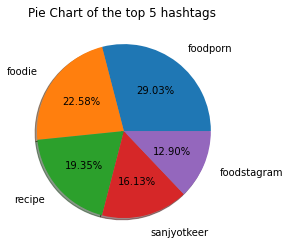

In [47]:
from matplotlib.pyplot import figure
plt.figure(num=None)
x=a[:5]
y=b[:5]
plt.pie(y, labels=x, autopct='%.2f%%', shadow=True, labeldistance=1.2)
plt.title('Pie Chart of the top 5 hashtags ')
plt.show()


In [ ]:
#check famous5=['foodgod', 'yourfoodlab', 'foodrush.recipe', 'dilsefoodie', 'foodtalkindia']


In [49]:
like_count=[]
for i in famous5:
    first_run = True
    driver.get('https://www.instagram.com/')
    time.sleep(4)
    search_click=driver.find_element_by_class_name('TqC_a')
    search_click.click()
    time.sleep(2)
    search=driver.find_element_by_class_name('x3qfX')
    print('......', i)
    search.send_keys(i)
    time.sleep(5)
    driver.execute_script('document.getElementsByClassName("fuqBx")[0].scrollTo(0, 50);')
    so=driver.find_element_by_partial_link_text(i)
    so.click()
    time.sleep(3)
    count=0
    post_count = 0
    
    time.sleep(3)
    post_data = driver.find_elements_by_xpath('//a/div[@class="eLAPa"]')
    print('post_data', len(post_data))
    for j in post_data:
        post_count += 1
        if post_count > 10:
            break
        time.sleep(7)
        if first_run:    
            j.click()
            first_run = False
        like_view = wait.until(EC.presence_of_element_located((By.XPATH,"//div[@class='eo2As ']/section[2]")))
        if "views" in like_view.text:
            button = wait.until(EC.presence_of_element_located((By.XPATH,"//div[@class='eo2As ']/section[2]/div/span")))
            button.click()                
            video_likes = wait.until(EC.presence_of_element_located((By.XPATH,"//div[@class='eo2As ']/section[2]/div/div/div[4]/span")))
            video_like = int(video_likes.text.replace(',','').strip())
            print('video likes', video_like)
            count += video_like
            time.sleep(3)
            button = wait.until(EC.presence_of_element_located((By.XPATH,"//div[@class='zZYga']")))
            button.click()
            time.sleep(3)
        else:
            likes = wait.until(EC.presence_of_element_located((By.XPATH,"//div[@class='Nm9Fw']/button/span")))
            like = int(likes.text.replace(',','').strip())
            print('image likes', like)
            count += like
        time.sleep(3)
        next_post=driver.find_element_by_xpath('//a[contains(@class,"_65Bje ")]')
        time.sleep(3)
        next_post.click()
    print(i, '-----', count, 'on first 10 posts')
    like_count.append(count)
count

...... yourfoodlab
post_data 12
image likes 29685
video likes 27781
image likes 35716
image likes 32446
video likes 45122
image likes 55034
video likes 45502
video likes 23716
image likes 19961
video likes 20128
yourfoodlab ----- 335091 on first 10 posts
...... foodtalkindia
post_data 12
image likes 667
image likes 245
video likes 238
image likes 433
video likes 93
image likes 352
image likes 639
video likes 145
image likes 772
image likes 640
foodtalkindia ----- 4224 on first 10 posts
...... delhifoodwalks
post_data 12
image likes 515
video likes 229
image likes 1101
image likes 1374
image likes 186
image likes 397
image likes 776
image likes 1737
image likes 1215
video likes 652
delhifoodwalks ----- 8182 on first 10 posts
...... food_gambler
post_data 12
image likes 1660
image likes 906
image likes 1178
image likes 1889
image likes 618
image likes 1144
image likes 3672
image likes 461
image likes 2712
image likes 13176
food_gambler ----- 27416 on first 10 posts
...... delhifoodguide


11955

In [24]:

npfollowers=np.array(famous5follow)
print(npfollowers)
nplikes=np.array(like_count)
print(nplikes)

[1508351  303116  130926  107766  104031]
[334205   4219   8179  27316  11955]


In [25]:
average_likes=nplikes/10
average_likes

array([33420.5,   421.9,   817.9,  2731.6,  1195.5])

In [26]:
ratio=npfollowers/average_likes
ratio

array([ 45.13250849, 718.4546101 , 160.07580389,  39.45160346,
        87.01882058])

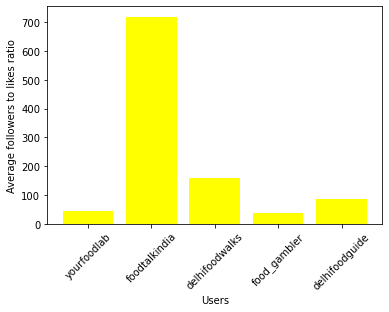

In [32]:

plt.bar(famous5, ratio, color='yellow')
plt.xticks(rotation=45)
plt.xlabel('Users')
plt.ylabel('Average ratio')

plt.show()